### Anisotropic Filter


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
gray_image = cv2.imread('lanus.png', cv2.IMREAD_GRAYSCALE)

### Difusión Anisotrópica

La función `anisotropic_diffusion` implementa un proceso de **difusión anisotrópica** que permite suavizar una imagen mientras preserva sus bordes. Este método es útil para reducir el ruido sin afectar significativamente las estructuras importantes de la imagen, como los contornos de los objetos.

En cada iteración, el algoritmo calcula gradientes (diferencias) en las cuatro direcciones principales (norte, sur, este y oeste). Basado en estos gradientes y el parámetro de sensibilidad `kappa`, se calcula una función de borde que determina cuánto suavizar en cada dirección.



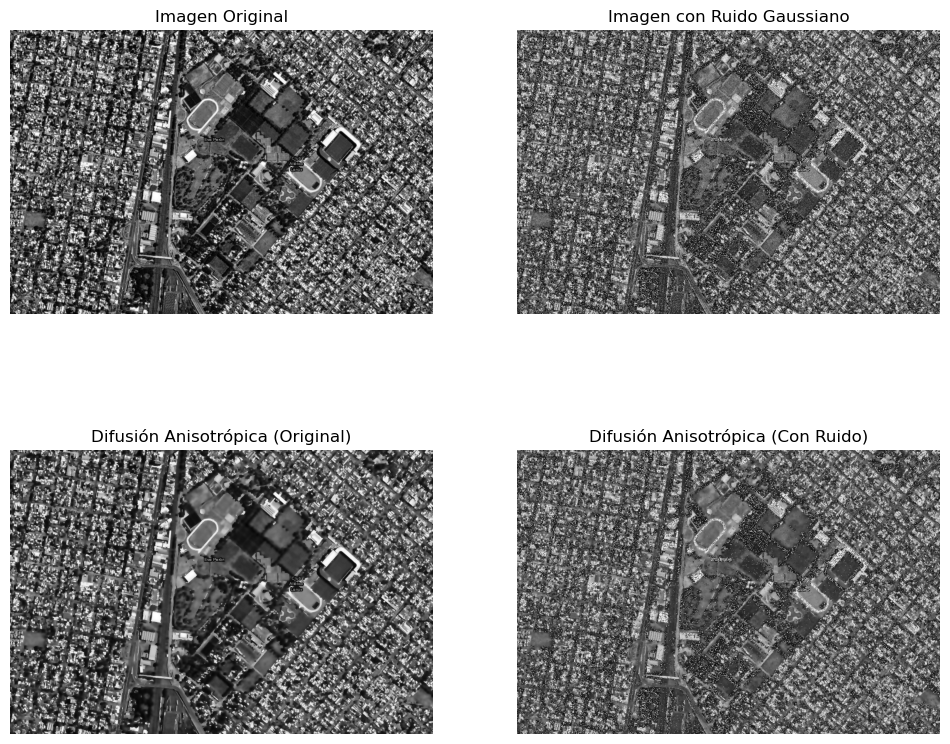

In [20]:
# Función para añadir ruido gaussiano
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    gaussian_noise = np.random.normal(mean, stddev, image.shape)
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Función de difusión anisotrópica
def anisotropic_diffusion(img, num_iterations=10, kappa=50, gamma=0.1, option=1):
    img = img.astype(np.float32)
    for i in range(num_iterations):
        north = np.roll(img, -1, axis=0) - img
        south = np.roll(img, 1, axis=0) - img
        east = np.roll(img, -1, axis=1) - img
        west = np.roll(img, 1, axis=1) - img

        if option == 1:
            c_north = np.exp(-(north / kappa) ** 2)
            c_south = np.exp(-(south / kappa) ** 2)
            c_east = np.exp(-(east / kappa) ** 2)
            c_west = np.exp(-(west / kappa) ** 2)
        elif option == 2:
            c_north = 1 / (1 + (north / kappa) ** 2)
            c_south = 1 / (1 + (south / kappa) ** 2)
            c_east = 1 / (1 + (east / kappa) ** 2)
            c_west = 1 / (1 + (west / kappa) ** 2)

        img += gamma * (c_north * north + c_south * south + c_east * east + c_west * west)
    return img.astype(np.uint8)

# Aplicar ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = add_gaussian_noise(gray_image, 0, 25, 70)

# Aplicar difusión anisotrópica a la imagen original y con ruido
diffused_img_original = anisotropic_diffusion(gray_image, num_iterations=15, kappa=30, gamma=0.15, option=1)
diffused_img_noisy = anisotropic_diffusion(imagen_ruido_gaussiano, num_iterations=15, kappa=30, gamma=0.15, option=1)

# Configuración de la figura para mostrar todas las imágenes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Mostrar las imágenes en los subplots
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title("Imagen Original")
axes[0, 0].axis("off")

axes[0, 1].imshow(imagen_ruido_gaussiano, cmap='gray')
axes[0, 1].set_title("Imagen con Ruido Gaussiano")
axes[0, 1].axis("off")

axes[1, 0].imshow(diffused_img_original, cmap='gray')
axes[1, 0].set_title("Difusión Anisotrópica (Original)")
axes[1, 0].axis("off")

axes[1, 1].imshow(diffused_img_noisy, cmap='gray')
axes[1, 1].set_title("Difusión Anisotrópica (Con Ruido)")
axes[1, 1].axis("off")

plt.show()



#### Conclusiones: 

##### La imagen resultante después de la difusión anisotrópica muestra una reducción del ruido y una mayor suavidad en las áreas homogéneas. Sin embargo, los bordes de las estructuras (por ejemplo, la cancha y las calles) se conservan, lo que permite que los contornos se mantengan definidos a pesar de la reducción de ruido. 